Data from N:\GDrive\MasterProef\objective_tests\data\latency\latency_sheet

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootdir = os.path.dirname(os.path.dirname(currentdir))
sys.path.insert(0,rootdir) 
from config import data_path,output_path

In [2]:
import numpy as np

In [3]:
output_folder = output_path

In [4]:
# data in excel sheets

In [5]:

camera_projector_latency = np.asarray([
    0.18,
    0.17,
    0.18,
    0.16,
    0.18,
    0.2,
    0.17,
    0.18,
    0.18,
    0.18,
    0.18,
    0.18,
    0.18,
    0.17,
    0.17,
    0.18,
    0.18,
    0.18,
    0.18,
    0.18,
    0.17,
    0.17,
    0.21,
    0.18,
    0.21,
    0.18,
    0.17,
    0.18,
    0.18,
    0.18,
])

projector_monitor_latency = np.asarray([
    0.06,
    0.05,
    0.04,
    0.05,
    0.05,
    0.05,
    0.03,
    0.03,
    0.03,
    0.03,
    0.03,
    0.03,
    0.03,
    0.03,
    0.06,
    0.05,
    0.04,
    0.05,
    0.05,
    0.04,
    0.04,
    0.05,
    0.03,
    0.03,
    0.03,
    0.03,
    0.05,
    0.05,
    0.06,
    0.05,
])


In [6]:
data= [camera_projector_latency*1000, projector_monitor_latency*1000]
data_labels =["camera - projector", "monitor - projector"]


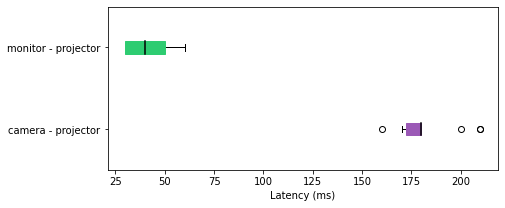

In [7]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (7,3)


medianprops = dict(linestyle='-', linewidth=1.5, color='black')
fig1, ax1 = plt.subplots()
box = ax1.boxplot(data,notch=False, patch_artist=True, medianprops=medianprops, vert=False)
ax1.set_yticklabels(data_labels)
plt.xlabel("Latency (ms)")
colors = ['#9B59B6', '#2ECC71' ]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(color)
    
plt.savefig(f"{output_folder}/latency.pdf",bbox_inches='tight', transparent="True", pad_inches=0)
plt.show() 

In [8]:
def stats(line,array):
    print(f"{line}: {round(np.mean(array)*1000,2)} +- {round(np.std(array)*1000,2)}")

In [9]:
stats("cam-proj",camera_projector_latency )
stats("proj-mon",projector_monitor_latency )

cam-proj: 179.67 +- 10.48
proj-mon: 41.67 +- 10.67


# MAIN PLOT

In [10]:
import numpy as np
import matplotlib.pyplot as plt


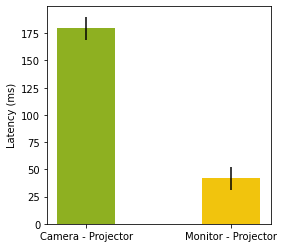

In [11]:
plt.rcParams["figure.figsize"] = (4,4)

# Calculate the average
camproj = np.mean(camera_projector_latency*1000)
projmon = np.mean(projector_monitor_latency*1000)

# Calculate the standard deviation
camproj_std = np.std(camera_projector_latency*1000)
projmon_std = np.std(projector_monitor_latency*1000)

# Define labels, positions, bar heights and error bar heights
labels = [  'Camera - Projector', 'Monitor - Projector']
x_pos = np.arange(len(labels))
CTEs = [camproj, projmon]
error = [camproj_std, projmon_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       color=['#8EB021', '#F1C40D'],
       ecolor='black',
       width=0.4,
       capsize=0)
ax.set_ylabel('Latency (ms)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels,rotation=0)


    
plt.savefig(f"{output_folder}/latency.pdf",bbox_inches='tight', transparent="True", pad_inches=0)
plt.show() 


# COMPACT PLOT

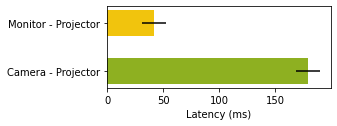

In [12]:
plt.rcParams["figure.figsize"] = (4,1.5)
# Build the plot
fig, ax = plt.subplots()
ax.barh(x_pos, CTEs,
       xerr=error,
       align='center',
       color=['#8EB021', '#F1C40D'],
       ecolor='black',
       height=0.55,
       capsize=0)
ax.set_xlabel('Latency (ms)')
ax.set_yticks(x_pos)
ax.set_yticklabels(labels,rotation=0)


    
plt.savefig(f"{output_folder}/latency_xs.pdf",bbox_inches='tight', transparent="True", pad_inches=0)
plt.show() 